<a href="https://colab.research.google.com/github/Arunprakash18233/final-sem/blob/main/Contactless-fingerprint-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras 

In [2]:
import tensorflow
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

In [3]:
from keras.preprocessing import image
import numpy as np

In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt

In [5]:
#vgg16_model=VGG16()
resnet_model=ResNet50()

102981632/102967424 [==============================] - 1s 0us/step


In [6]:
#vgg16_model.summary()
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [7]:
type(resnet_model)

keras.engine.functional.Functional

In [8]:
IMAGE_SIZE = [224, 224]
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [9]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [10]:
for layer in resnet.layers:
    layer.trainable = False

In [11]:
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [13]:
from google.colab import files
uploaded = files.upload()

Saving Data.zip to Data.zip


In [14]:
!unzip 'Data.zip'

Archive:  Data.zip
   creating: Data/
   creating: Data/Test/
   creating: Data/Test/kappa/
  inflating: Data/Test/kappa/enhanced_image_h1.jpg  
  inflating: Data/Test/kappa/enhanced_image_h2.jpg  
  inflating: Data/Test/kappa/enhanced_image_h3.jpg  
  inflating: Data/Test/kappa/enhanced_image_h4.jpg  
   creating: Data/Test/hrishi/
  inflating: Data/Test/hrishi/enhanced_image_n1.jpg  
  inflating: Data/Test/hrishi/enhanced_image_n2.jpg  
  inflating: Data/Test/hrishi/enhanced_image_n3.jpg  
  inflating: Data/Test/hrishi/enhanced_image_n4.jpg  
   creating: Data/Test/yudhistir/
  inflating: Data/Test/yudhistir/enhanced_image_s1.jpg  
  inflating: Data/Test/yudhistir/enhanced_image_s3.jpg  
  inflating: Data/Test/yudhistir/enhanced_image_s4.jpg  
  inflating: Data/Test/yudhistir/_s2.jpg  
   creating: Data/Test/arun/
  inflating: Data/Test/arun/enhanced_image_v1.jpg  
  inflating: Data/Test/arun/enhanced_image_v2.jpg  
  inflating: Data/Test/arun/enhanced_image_v3.jpg  
  inflating: Dat

In [15]:
# useful for getting number of classes
folders = glob('Data/Train/*')
print(len(folders))

4


In [16]:
train='Data/Train'
test='Data/Test'
#valid='Data/Valid'

In [17]:
len(train)

10

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [20]:
# Data Augmentation
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [21]:
from keras.preprocessing.image import ImageDataGenerator
train_set=train_datagen.flow_from_directory(train,target_size=(224,224),class_mode='categorical',
                                                      batch_size=32)
test_set=test_datagen.flow_from_directory(test,target_size=(224,224),class_mode='categorical',   
                                                      batch_size=32)
#valid_set=valid_datagen.flow_from_directory(valid,target_size=(224,224),class_mode='categorical',
 #                                           batch_size=4,shuffle=True)

Found 16 images belonging to 4 classes.
Found 16 images belonging to 4 classes.


In [22]:
from keras import optimizers
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [23]:
train_set.class_indices

{'arun': 0, 'hrishi': 1, 'kappa': 2, 'yudhistir': 3}

In [24]:
r = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
1/1 [==============================] - 10s 10s/step - loss: 2.5950 - accuracy: 0.4375 - val_loss: 37.0738 - val_accuracy: 0.2500
Epoch 2/50
1/1 [==============================] - 5s 5s/step - loss: 36.5989 - accuracy: 0.2500 - val_loss: 15.7129 - val_accuracy: 0.5625
Epoch 3/50
1/1 [==============================] - 6s 6s/step - loss: 17.1630 - accuracy: 0.5625 - val_loss: 10.4214 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 5s 5s/step - loss: 15.9587 - accuracy: 0.5000 - val_loss: 2.9992 - val_accuracy: 0.6250
Epoch 5/50
1/1 [==============================] - 5s 5s/step - loss: 4.7204 - accuracy: 0.5000 - val_loss: 14.9990 - val_accuracy: 0.4375
Epoch 6/50
1/1 [==============================] - 8s 8s/step - loss: 6.6381 - accuracy: 0.4375 - val_loss: 6.9623 - val_accuracy: 0.5625
Epoch 7/50
1/1 [==============================] - 6s 6s/step - loss: 4.7141 - accuracy: 0.6250 - val_loss: 3.8656 - val_accuracy: 0.6250
Epoch 8/50
1/1 [================

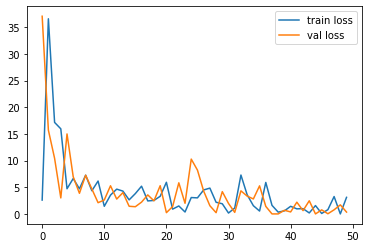

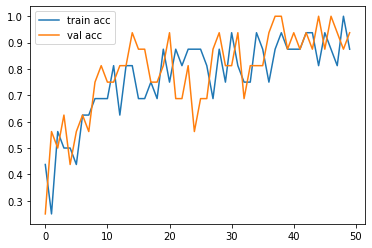

<Figure size 432x288 with 0 Axes>

In [25]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
pred=model.predict_generator(test_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [27]:
test_set.class_indices

{'arun': 0, 'hrishi': 1, 'kappa': 2, 'yudhistir': 3}

In [28]:
print(pred)

[[3.2324649e-29 1.0000000e+00 5.8876949e-24 0.0000000e+00]
 [9.9999976e-01 1.9158836e-07 5.3270490e-16 4.7680186e-31]
 [6.0732897e-25 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 9.2516417e-28 6.7912941e-23 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 4.0402459e-29 2.0586114e-28 1.0000000e+00]
 [0.0000000e+00 4.1680243e-05 9.9995828e-01 8.9358957e-35]
 [1.0000000e+00 9.8450370e-24 1.0337589e-18 0.0000000e+00]
 [0.0000000e+00 5.0397300e-13 1.0000000e+00 4.3353571e-16]
 [9.9999774e-01 2.2991928e-06 4.4506235e-10 1.7575761e-23]
 [3.6333562e-31 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.0976601e-20 1.0000000e+00 5.4332218e-36]
 [9.9893898e-01 1.0609890e-03 1.1348537e-19 3.6300310e-29]
 [3.8908253e-27 1.0000000e+00 2.8119899e-25 0.0000000e+00]
 [0.0000000e+00 1.1184429e-32 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 2.0590984e-28 1.0000000e+00 3.0570261e-31]]


In [29]:
predicted_class_indices=np.argmax(pred,axis=1)

In [30]:
predicted_class_indices

array([1, 0, 1, 3, 3, 3, 2, 0, 2, 0, 1, 2, 0, 1, 3, 2])

In [31]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [32]:
print(labels)

{0: 'arun', 1: 'hrishi', 2: 'kappa', 3: 'yudhistir'}


In [33]:
print(test_set.filenames)

['arun/enhanced_image_v1.jpg', 'arun/enhanced_image_v2.jpg', 'arun/enhanced_image_v3.jpg', 'arun/enhanced_image_v4.jpg', 'hrishi/enhanced_image_n1.jpg', 'hrishi/enhanced_image_n2.jpg', 'hrishi/enhanced_image_n3.jpg', 'hrishi/enhanced_image_n4.jpg', 'kappa/enhanced_image_h1.jpg', 'kappa/enhanced_image_h2.jpg', 'kappa/enhanced_image_h3.jpg', 'kappa/enhanced_image_h4.jpg', 'yudhistir/_s2.jpg', 'yudhistir/enhanced_image_s1.jpg', 'yudhistir/enhanced_image_s3.jpg', 'yudhistir/enhanced_image_s4.jpg']


In [34]:
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [35]:
from tensorflow.keras.preprocessing import image
mymodel=load_model('model_resnet50.h5')

In [36]:
import cv2
import matplotlib.pyplot as plt

arun


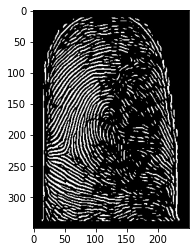

In [38]:
IMG_PATH="Data/Test/arun/enhanced_image_v1.jpg"
myimage=cv2.imread(IMG_PATH)
plt.imshow(myimage)
img=image.load_img(IMG_PATH,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
mymodel.predict(img_data)
#see index 1 having highest probability 99.96%
a=np.argmax(mymodel.predict(img_data),axis=1)
if(a==0):
  print("arun")
if(a==1):
  print("hrishi")
if(a==2):
  print("kappa")
if(a==3):
  print("yudhistir")